This notebook addresses [HackerRank's](https://www.hackerrank.com) 10 Days of Statistics Normal Distribution challenges from Day 5:
* [Normal Distribution I](https://www.hackerrank.com/challenges/s10-normal-distribution-1/problem)
* [Normal Distribution II](https://www.hackerrank.com/challenges/s10-normal-distribution-2/problem)

Statistics was on my mind on September 26, 2020 after listening to an interview that was part of Women Who Code DC's Virtual Career Services Day.
A few data scientists were interviewed about working in Data Science and there were many great pieces of advice. Among them was that it is helpful to have a strong statistics foundation.
I wrapped up my Data Science course with a Natural Language Processing project, but that comment encouraged me to review the basics.

I may as well be able to answer a question about basic statistics in interviews and keep coding patterns front-of-mind so I can access them under pressure!

In fact, having a normal distribution is one assumption necessary for conducting linear regressions.

In [1]:
#packages used in this notebook
import random
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [4]:
plt.style.use("seaborn")

# Normal Distribution I
## Prompt:
In a certain plant, the time taken to assemble a car is a random variable, $X$, having a normal distribution with a mean of 20 hours and a standard deviation of 2 hours. What is the probability that a car can be assembled at this plant in:

1. Less than 19.5 hours?
2. Between 20 and 22 hours?

#### Input Format

There are three lines of input:
```
20 2
19.5
20 22
```
The first line contains 2 space-separated values denoting the respective mean and standard deviation for $X$. The second line contains the number associated with question 1. The third line contains 2 space-separated values describing the respective lower and upper range boundaries for question 2.

#### Output Format

There are two lines of output. Your answers must be rounded to a scale of 3 decimal places (e.g., 1.234):

On the first line, print the answer to question 1 (the probability that a car can be assembled in less than 19.5 hours).
On the second line, print the answer to question 2 (the probability that a car can be assembled in 20 to 22 hours).

In [115]:
mean, std = 20, 2
quest1 = 19.5
quest2 = [20, 22]

In [133]:
#write information to text file
with open("normdist1.txt", "w") as file: #w clears and writes over any information already there
    file.write(f"{mean} {std} \n")
    file.write(f"{quest1} \n")
    file.write(f"{quest2[0]} {quest2[1]}")
#using reserved word "with" intead of needing to specify file.close()

In [4]:
#read information from text file
with open("normdist1.txt","r") as file:
    mean, std = [int(i) for i in file.readline().strip().split(' ')]
    quest1 = float(file.readline().strip())
    quest2 = [int(i) for i in file.readline().strip().split(' ')]

With a mean ($\mu$) of 20 and standard deviation ($\sigma$) 2, 18 and 22 are 1$\sigma$ away from the $\mu$.

One way to solve the first question is to find what the cumulative probability is for values from 0 to 19.5.

In a graphical sense, to sum up the area under the curve from 0 to 19.5.

In [7]:
begin = 13
end = 27
xval = np.arange(begin,end,0.01) #range of x values, covering mean-7 and mean+7
yval = norm.pdf(xval,20,2) #probability density function for those values around the mean of 20 and standard deviation of 2

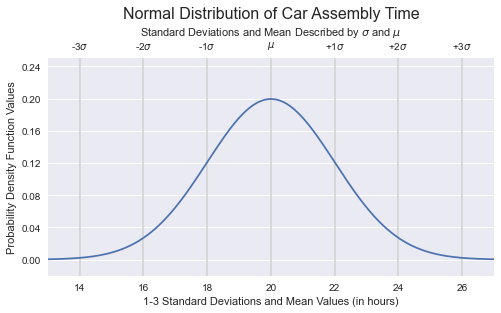

In [69]:
#create graph showing this normal distribution
fig, ax = plt.subplots(figsize=(8,4))
xticklist = [14,16,18,20,22,24,26]

plt.xlim((begin,end)) #set x limits

ax2 = ax.twiny() #set y axis to also be the same for ax2; upper axis
ax2.set_xlim(ax.get_xlim()) #give same x limits to upper axis
ax2.set_xticks(xticklist) #set upper axis tick positions
ax2.set_xticklabels(["-3$\sigma$","-2$\sigma$","-1$\sigma$","$\mu$","+1$\sigma$","+2$\sigma$","+3$\sigma$"])

ax2.vlines(xticklist,ymin=-.02,ymax=.25,color="lightgrey")

#set y ticks and limits
plt.yticks(np.arange(0,.26,step=.04))
plt.ylim((-0.02,.25))

ax2.plot(xval,yval)

ax2.set_xlabel("Standard Deviations and Mean Described by $\sigma$ and $\mu$")
ax.set_xlabel("1-3 Standard Deviations and Mean Values (in hours)")
ax.set_ylabel("Probability Density Function Values")
plt.title("Normal Distribution of Car Assembly Time",size=16)

plt.show()

In [51]:
#calculate sum of pdf at standard deviation values and mean
xticklist = [14,16,18,20,22,24,26]
begin, end = 13, 27
sumvals = []

#make first item from begin to first item in xticklist
first = xticklist[0]
stdrange = np.arange(begin,first,0.01)
pdfvals = norm.pdf(stdrange,20,2)
total = sum(pdfvals)
sumvals.append(total)

for i, stdev in enumerate(xticklist):
    if i==(len(xticklist)-1): #last range should be from last value to end
        stdrange = np.arange(stdev,end,0.01)
    else:#range between current and next value in xticklist
        stdrange = np.arange(stdev,xticklist[i+1],0.01) #generate range

    pdfvals = norm.pdf(stdrange,20,2) #get pdf values for the range
    total = sum(pdfvals)#sum pdfvals
    #total+=sum(sumvals)#add sum of all prior pdf values
    sumvals.append(total)#add total to end of list

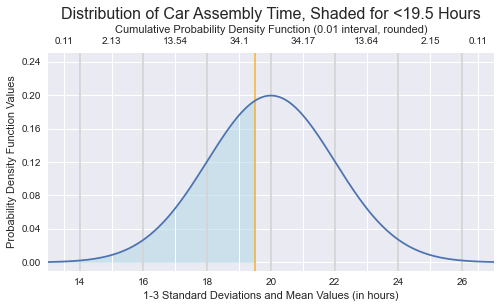

In [67]:
#plot with area shaded under curve up to 19.5, with select total sums of the pdf on upper axis
fig, ax = plt.subplots(figsize=(8,4))

plt.xlim((13,27)) #set x limits

ax2 = ax.twiny() #set y axis to also be the same for ax2 plot axes
ax2.set_xlim(ax.get_xlim()) #give same x limits to upper axis
x2ticklist = [13.5,15,17,19,21,23,25,26.5] #8 positions in between xticklist 13 and 14, 14 and 16, . . . 24 and 26, 26 and 27
ax2.set_xticks(x2ticklist) #set upper axis tick positions
ax2.set_xticklabels([round(sumval,2) for sumval in sumvals])

#set y ticks and limits
plt.yticks(np.arange(0,.26,step=.04))
plt.ylim((-0.01,.25))

#plot curve and standard deviation dividing lines
ax2.plot(xval,yval)
ax2.vlines(xticklist,ymin=-.02,ymax=.25,color="lightgrey")

#add shading up to and line at 19.5
threshold = quest1
ax.axvline(quest1, color='orange', alpha=0.7)
ax.fill_between(xval, yval, 0, where=(xval <= 19.5), color='lightblue', alpha=0.5)

#title axes and plot
ax2.set_xlabel("Cumulative Probability Density Function (0.01 interval, rounded)")
ax.set_xlabel("1-3 Standard Deviations and Mean Values (in hours)")
ax.set_ylabel("Probability Density Function Values")
plt.title("Distribution of Car Assembly Time, Shaded for <19.5 Hours",size=16)

plt.show()

### Mathematics of the Cumulative Distribution Function and Probability Density Function for a Normal Distribution

Adapted from the NIST Engineering Statistics Handbook [Section 1.3.6.6.1](https://itl.nist.gov/div898/handbook/eda/section3/eda3661.htm) on the Normal Distribution.

The probability density function can be calculated for the value $x$ with:

$$\frac{1}{\sqrt{2\pi}\sigma}\space\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

where $\sigma$ is the standard deviation and $\mu$ is the mean.

The cumulative distribution function of the value $x$ in a normal distribution is the sum over the interval from $-\infty$ to $x$ of the probability density function:
$$\int^{x}_{-\infty}\frac{1}{\sqrt{2\pi}\sigma}\space\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

For this problem, we would plug in 19.5 for $x$ and use 0 instead of negative infinity since we would assume a car cannot be assembled in a negative amount of hours.

In [11]:
#coding a function using the formula above
def myPDF(x,mu,sig):
    '''
    Calculates the Probability Density Function (PDF) for a normal distribution with mu mean and sig standard deviation at the
    given x.
    
    Args:
        x (float) : the value at which to calculate the PDF
        mu (float) : the mean
        sig (float) : the standard deviation (>0)
        
    Returns:
        (float) : PDF at x for the normal distribution described by mu and sig
    '''
    part1 = 1/float(math.sqrt(2*math.pi)*sig)
    sqdiff = -(x-mu)**2
    part2 = sqdiff/float(2*sig**2)
    return part1*(math.e**part2) # e** is exp()

In [30]:
norm.pdf(18,20,2)

0.12098536225957168

In [29]:
myPDF(18,20,2)

0.12098536225957168

This function closely matches the result provided by `scipy.stats.norm.pdf`.

# Normal Distribution II
## Prompt:

The final grades for a Physics exam taken by a large group of students have a mean of 70 and a standard deviation of 10. If we can approximate the distribution of these grades by a normal distribution, what percentage of the students:

1. Scored higher than 80 (had a grade > 80)?
2. Passed the test (had a grade $\ge$ 60)?
3. Failed the test (had a grade < 60)?

Find and print the answer to each question on a new line, rounded to a scale of 2 decimal places.

#### Input Format

There are three lines of input (shown below):
```
70 10
80
60
```
The first line contains 2 space-separated values denoting the respective mean and standard deviation for the exam. The second line contains the number associated with question 1. The third line contains the pass/fail threshold number associated with questions 2 and 3.

#### Output Format

There are three lines of output. Your answers must be rounded to a scale of 2 decimal places (e.g., `1.23`):

1. On the first line, print the answer to question 1 (the percentage of students that received a grade > 80).
2. On the second line, print the answer to question 2 (the percentage of students that received a grade $\ge$ 60).
3. On the third line, print the answer to question 3 (the percentage of students that received a grade < 60).

In [139]:
#read in text file for this question
with open("normdist2.txt",'r') as file:
    mean2, std2 = [int(i) for i in file.readline().strip().split(' ')] #split at single space,
    q1 = int(file.readline().strip()) #remove trailing and leading whitespace,
    q2 = q3 = int(file.readline().strip()) #and convert to integer